In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DRUGS_IN_PREGNANCY.csv", low_memory= False)

In [3]:
df.head()

,PublicID,LineNumber,DrugName,DrugCode,ReasonCode,VXXC01a,VXXC01b,VXXC01c,VXXC01d,VXXC01e,VXXC01f,VXXC01g,VXXC01h,VXXC01i,VXXC01j,VXXC01k
0,00004O,1,IBUPROFEN,102,da1,001,IBUPROFEN,102.0,CRAMPING,da1,0,1,1,1,0,1
1,00004O,2,DIPHENHYDRAMINE,290,da1,002,BENADRYL,290.0,ALLERGIES,da1,0,1,1,1,0,1
2,00004O,3,PRENATAL VITAMIN,510,db1,003,PNV,510.0,PREGNANCY,db1,0,3,NaN,1,0,1
3,00004O,4,ALBUTEROL,271,ab1,004,ALBUTEROL,271.0,ASTHMA,ab1,0,1,3,1,0,1
4,00004O,5,FLUTICASONE,272,ab1,005,ADVAIR,272.0,ASTHMA,ab1,1,1,1,1,0,1


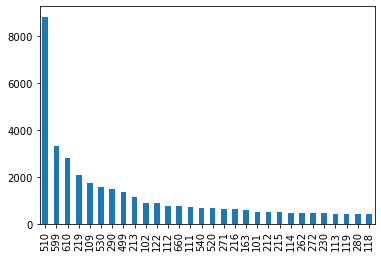

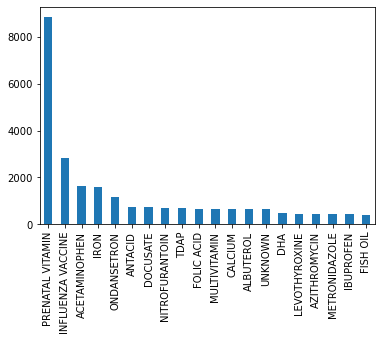

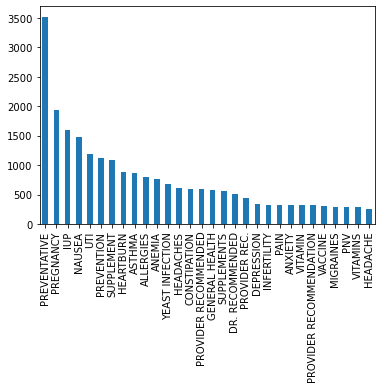

In [4]:
#df['DrugCode'].value_counts().plot.bar()
#df['DrugCode'].plot.hist()
top_categories = df['DrugCode'].value_counts().nlargest(30)
top_categories.plot(kind='bar')
plt.show()
top_categories = df['DrugName'].value_counts().nlargest(20)
top_categories.plot(kind='bar')
plt.show()
top_categories = df['VXXC01d'].value_counts().nlargest(30)
top_categories.plot(kind='bar')
plt.show()


In [5]:
pd.set_option('display.max_rows', None)
df['DrugName'].value_counts()


PRENATAL VITAMIN                                              8838
INFLUENZA VACCINE                                             2812
ACETAMINOPHEN                                                 1625
IRON                                                          1580
ONDANSETRON                                                   1144
ANTACID                                                        745
DOCUSATE                                                       722
NITROFURANTOIN                                                 691
TDAP                                                           691
FOLIC ACID                                                     657
MULTIVITAMIN                                                   653
CALCIUM                                                        638
ALBUTEROL                                                      637
UNKNOWN                                                        632
DHA                                                           

In [6]:
df['count'] = df['DrugName'].map(df['DrugName'].value_counts())
unique_values = df['DrugName'].unique()
unique_values_df = pd.DataFrame(df['DrugName'].unique(), columns=['unique_values'])
unique_values_df['count'] = df['DrugName'].map(df['DrugName'].value_counts())
unique_values_df

# new_df = df[['DrugName', 'count', 'VXXC01d']]


,unique_values,count
0,IBUPROFEN,422
1,DIPHENHYDRAMINE,376
2,PRENATAL VITAMIN,8838
3,ALBUTEROL,637
4,FLUTICASONE,272
5,ACETAMINOPHEN/HYDROCODONE,91
6,INFLUENZA VACCINE,2812
7,FOLIC ACID,272
8,METRONIDAZOLE,637
9,ACETAMINOPHEN,657


In [7]:
df['count'] = df['DrugName'].map(df['DrugName'].value_counts())
unique_values_df = pd.DataFrame(df['DrugName'].unique(), columns=['DrugName'])
unique_values_df['count'] = unique_values_df['DrugName'].map(df['DrugName'].value_counts())
unique_values_df = unique_values_df.sort_values(by='count', ascending=False)
print(unique_values_df)


                                              DrugName  count
2                                     PRENATAL VITAMIN   8838
6                                    INFLUENZA VACCINE   2812
9                                        ACETAMINOPHEN   1625
20                                                IRON   1580
23                                         ONDANSETRON   1144
13                                             ANTACID    745
21                                            DOCUSATE    722
43                                      NITROFURANTOIN    691
37                                                TDAP    691
7                                           FOLIC ACID    657
39                                        MULTIVITAMIN    653
45                                             CALCIUM    638
3                                            ALBUTEROL    637
16                                             UNKNOWN    632
65                                                 DHA    474
11      

In [8]:
reasons_df = df.groupby('DrugName')['VXXC01d'].apply(list).reset_index(name='VXXC01d')
unique_values_df = pd.merge(unique_values_df, reasons_df, on='DrugName')
unique_values_df

,DrugName,count,VXXC01d
0,PRENATAL VITAMIN,8838,"[PREGNANCY, IUP, PREGNANCY, PREGNANCY, PREVENT..."
1,INFLUENZA VACCINE,2812,"[PREVENTATIVE, PREVENTATIVE, PREVENTION, PREVE..."
2,ACETAMINOPHEN,1625,"[PAIN PRN, BACKPAIN, HEADACHES, HEADACHE, PRN ..."
3,IRON,1580,"[ANEMIA, ADDITIONAL IRON, LOW-IRON, GENERAL HE..."
4,ONDANSETRON,1144,"[NAUSEA, NAUSEA AND VOMITTING, NAUSEA, NAUSEA,..."
5,ANTACID,745,"[HEARTBURN, GERD, GI, HEARTBURN, NAUSEA, HEART..."
6,DOCUSATE,722,"[GENERAL HEALTH, CONSTIPATION, STOOL SOFTNER, ..."
7,NITROFURANTOIN,691,"[UTI, URINARY TRACT INF., UNKNOWN, UTI, PYLONE..."
8,TDAP,691,"[PREVENTATIVE, PREVENTATIVE, PREVENTATIVE, PRE..."
9,FOLIC ACID,657,"[IUP, PREGNANCY, PREVENTATIVE, PROVIDER RECOMM..."


In [9]:
unique_values_df.to_csv('unique_values.csv', index=False)


In [10]:
filtered_df = df[df['DrugName'].str.contains('vaccin', na=False, case=False)]

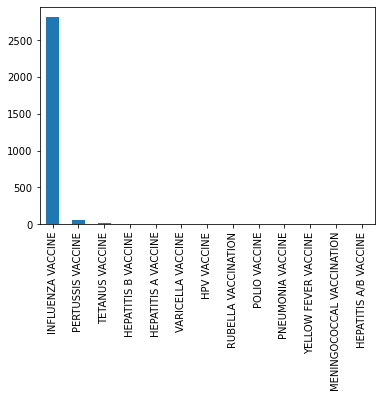

In [11]:
top_vacc = filtered_df['DrugName'].value_counts().nlargest(30)
top_vacc.plot(kind='bar')
plt.show()


In [12]:
filtered_df['DrugName'].value_counts()


INFLUENZA VACCINE            2812
PERTUSSIS VACCINE              53
TETANUS VACCINE                23
HEPATITIS B VACCINE            10
HEPATITIS A VACCINE             8
VARICELLA VACCINE               5
HPV VACCINE                     4
RUBELLA VACCINATION             4
POLIO VACCINE                   3
PNEUMONIA VACCINE               3
YELLOW FEVER VACCINE            2
MENINGOCOCCAL VACCINATION       2
HEPATITIS A/B VACCINE           1
Name: DrugName, dtype: int64

In [13]:
filtered_df_flu = df[df['DrugName'].str.contains('flu', na=False, case=False)]

In [14]:
filtered_df_flu['DrugName'].value_counts()


INFLUENZA VACCINE         2812
FLUTICASONE                272
FLUCONAZOLE                253
FLUOXETINE                  99
FLUOCINONIDE                 6
IV FLUIDS                    2
DIFLUPREDNATE                1
FLUOCINOLONE                 1
FLUDROCORTISONE              1
FLUORIDE                     1
FLUVOXAMINE                  1
SODIUM FLUORIDE              1
FLUOROMETHOLONE              1
FLUTICASONE/SALMETEROL       1
TRIFLURIDINE                 1
Name: DrugName, dtype: int64

In [15]:
drug_names = [
    'SERTRALINE', 'CITALOPRAM', 'FLUOXETINE', 'ZOLPIDEM', 'PROCHLORPERAZINE',
    'ALPRAZOLAM', 'ESCITALOPRAM', 'ADDERALL', 'CLONAZEPAM', 'LORAZEPAM',
    'LAMOTRIGINE', 'VENLAFAXINE', 'TRAZODONE', 'PAROXETINE', 'DULOXETINE',
    'GABAPENTIN', 'ARIPIPRAZOLE', 'METHYLPHENIDATE', 'QUETIAPINE',
    'AMITRIPTYLINE', 'LISDEXAMFETAMINE', 'BUSPIRONE', 'OXCARBAZEPINE',
    'DESVENLAFAXINE', 'PREGABALIN', 'OLANZAPINE', 'CARBAMAZEPINE', 'LITHIUM',
    'VALPROIC ACID', 'ZIPRASIDONE', 'RISPERIDONE', 'ESZOPICLONE',
    'HALOPERIDOL', 'LURASIDONE', 'ATOMOXETINE', 'PERPHENAZINE', 'MARIJUANA',
    'FLUVOXAMINE', 'VILAZODONE', 'CHLORPROMAZINE'
]

filtered_df = df[df['DrugName'].isin(drug_names)]

print(filtered_df)


      PublicID  LineNumber          DrugName  DrugCode ReasonCode VXXC01a  \
19      00017F           1          ADDERALL       499        bb1     001   
34      00021O           1        SERTRALINE       163        bb1     001   
56      00029V           1    DESVENLAFAXINE       164        bb1     001   
79      00034F           2       LAMOTRIGINE       176        ac1     002   
80      00034F           3        GABAPENTIN       171        ac1     003   
94      00038U           1        SERTRALINE       163        bb1     001   
119     00047T           2       LAMOTRIGINE       176        bb1     002   
120     00047T           3        FLUOXETINE       163        bb1     003   
130     00048R           6        SERTRALINE       163        bb1     006   
162     00062A           3        CITALOPRAM       163        bb1       3   
282     00116D           4  PROCHLORPERAZINE       212        ca1     004   
403     00186F           3        CITALOPRAM       163        bb1     003   

In [17]:
filtered_df['DrugName'].value_counts()

SERTRALINE          205
CITALOPRAM          145
FLUOXETINE           99
ZOLPIDEM             89
PROCHLORPERAZINE     85
ALPRAZOLAM           75
ESCITALOPRAM         66
ADDERALL             62
CLONAZEPAM           60
LORAZEPAM            50
LAMOTRIGINE          41
VENLAFAXINE          32
TRAZODONE            30
PAROXETINE           28
DULOXETINE           26
GABAPENTIN           23
ARIPIPRAZOLE         22
METHYLPHENIDATE      16
QUETIAPINE           14
AMITRIPTYLINE        11
LISDEXAMFETAMINE     11
BUSPIRONE            10
DESVENLAFAXINE        7
OXCARBAZEPINE         7
PREGABALIN            6
OLANZAPINE            5
RISPERIDONE           4
LITHIUM               4
CARBAMAZEPINE         4
HALOPERIDOL           4
VALPROIC ACID         4
ESZOPICLONE           4
ZIPRASIDONE           4
LURASIDONE            3
ATOMOXETINE           3
MARIJUANA             2
PERPHENAZINE          1
FLUVOXAMINE           1
CHLORPROMAZINE        1
VILAZODONE            1
Name: DrugName, dtype: int64

In [25]:
PublicID_list = filtered_df['PublicID']


PermissionError: [Errno 13] Permission denied: 'MH_medication_list.csv'

In [26]:
column_counts = filtered_df['VXXC01d'].value_counts().reset_index()
column_counts.columns = ['MH_reasons', 'value_counts']

column_counts.to_csv('MH_reason_counts.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'type'